# <span style="color:orange">XGBoost</span>

### <span style="color:orange">Importing the Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <span style="color:orange">Importing the Dataset</span>

In [2]:
dataset = pd.read_csv("Datasets\\Breast_Cancer.csv")

In [3]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


#### <span style="color:orange">Changing the class col for the ROC curve</span>

In [4]:
# Define a function to modify values
def modify_class_id(class_id):
    if class_id == 2: #// benign
        class_id = 0
    elif class_id == 4:  # // malignant
        class_id = 1
    return class_id

# Apply the function to column 'A'
dataset['Class'] = dataset['Class'].apply(modify_class_id)

dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [5]:
input_features = dataset.iloc[ : , 1:-1].values
dv = dataset.iloc[ : , -1].values

### <span style="color:orange">Splitting the dataset into Training set and Test set</span>

In [6]:
from sklearn.model_selection import train_test_split

input_features_train, input_features_test, dv_train, dv_test = train_test_split(input_features,
                                                                                dv,
                                                                                test_size=0.2,
                                                                                random_state=0)

### <span style="color:orange">Feature Scaling</span>

##### <span style="color:orange">Standardization</span>

In [7]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
input_features_train = standard_scaler.fit_transform(input_features_train)
input_features_test = standard_scaler.transform(input_features_test)

### <span style="color:orange">Training the XGBoost Model on the Training Set</span>

In [8]:
from xgboost import XGBClassifier

xGBoost = XGBClassifier()

xGBoost.fit(X=input_features_train, y=dv_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### <span style="color:orange">Predicting the Test Set Results</span>

In [9]:
dv_predicted = xGBoost.predict(X=input_features_test)

### <span style="color:orange">Making the Confusion Matrix</span>

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(dv_test, dv_predicted)
print(f"accuracy score = {accuracy_score(dv_test, dv_predicted) * 100}%")
print("Confusion Matrix: ", cm)

accuracy score = 97.08029197080292%
Confusion Matrix:  [[85  2]
 [ 2 48]]


### <span style="color:orange">**ROC curve For XGBoost Model</span>

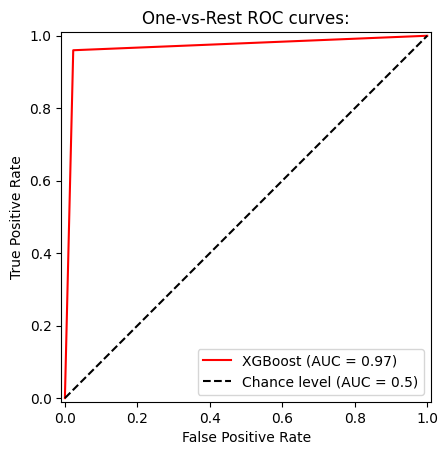

In [11]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted,
                                           name="XGBoost", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

### <span style="color:orange">**Another ROC curve For XGBoost Model</span>

<Figure size 640x480 with 0 Axes>

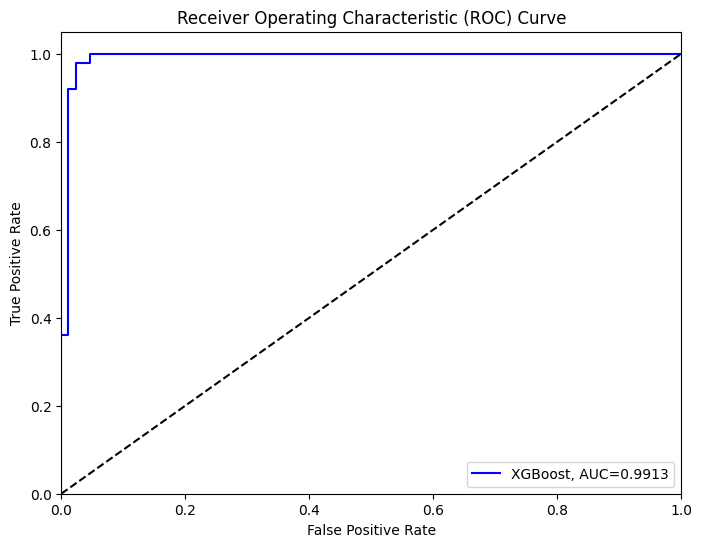

In [12]:
from sklearn import metrics

# set up plotting area
plt.figure(0).clf()

# 1.fit logistic regression model and plot ROC curve
model = xGBoost
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label="XGBoost, AUC=" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#add legend
# plt.legend()
# plt.title("ROC Curve for XGBoost")

### <span style="color:orange">Applying the K-Fold Cross Validation
</span>

In [13]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=xGBoost, X=input_features_train, y=dv_train, cv=10) * 100

accuracies_average = accuracies.mean()

accuracies_standard_deviation = accuracies.std()

In [14]:
print(f"SVC (RBF) accuracy: {accuracies_average}%")
print(f"SVC (RBF) standard deviation(variance): {accuracies_standard_deviation}%")

SVC (RBF) accuracy: 96.71043771043772%
SVC (RBF) standard deviation(variance): 1.9584298889826095%


****Low Bias (high accuracy) and Low Variance(low STD), which is a great result**.

### <span style="color:orange">Applying Kernel PCA</span>

In [15]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=True)
input_features_train = kernel_pca.fit_transform(input_features_train)
input_features_test = kernel_pca.transform(input_features_test)

### <span style="color:orange">Training the XGBoost Model on the new Training Set</span>

In [16]:
xGBoost2 = XGBClassifier()

xGBoost2.fit(X=input_features_train, y=dv_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### <span style="color:orange">Predicting the new Test Set Results</span>

In [17]:
dv_predicted2 = xGBoost2.predict(X=input_features_test)

### <span style="color:orange">Making the Confusion Matrix</span>

In [18]:
cm = confusion_matrix(y_true=dv_test, y_pred=dv_predicted2)
print(f"accuracy score = {accuracy_score(y_true=dv_test, y_pred=dv_predicted2) * 100}%")
print("Confusion Matrix: ", cm)

accuracy score = 96.35036496350365%
Confusion Matrix:  [[84  3]
 [ 2 48]]


### <span style="color:orange">Visualizing the Training Set Results</span>

C:\Users\hp\AppData\Local\Temp\ipykernel_10636\9025694.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


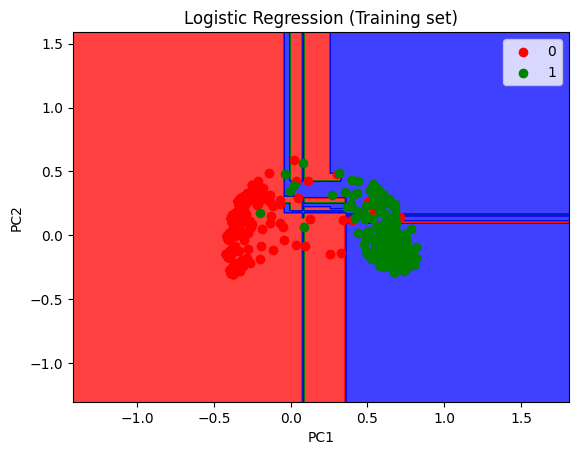

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = input_features_train, dv_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, xGBoost2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### <span style="color:orange">Visualizing the Test Set Results</span>

C:\Users\hp\AppData\Local\Temp\ipykernel_10636\741502141.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


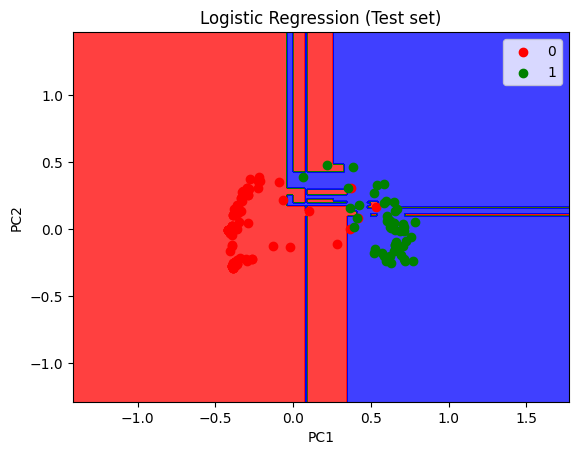

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = input_features_test, dv_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, xGBoost2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

___

#### I tried using LDA, but since it depends on the dependent variable as well and not only the input features. For LDA, the maximum number of components is min(n_features, n_classes - 1). In my case: I have a binary classification problem (2 classes: 0 and 1), so the max number of components can only be min(number_of_features, 2-1) = min(number_of_features, 1).


#### So, If you need to visualize the data in 2D, you could: Use PCA instead of LDA for visualization or combine LDA with another dimension reduction technique, which is what I did and it worked.

___